<a href="https://colab.research.google.com/github/nyp-sit/sdaai-pdc1-students/blob/master/ml-essentials/assignments/ml_assignment1_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Housing
# Overview
Feature engineering is a very important step in machine learning and is often the most time consuming step to make models accurate. It is the process of selecting, manipulating and transforming data into useful features for supervised learning in enhancing model performance and accuracy. One challenge of feature engineering in machine learning is often the dealing of categorical variables in dataset. Categorical variables often have many levels and yet most may not make real impact on the model and having most of these feature will detriment the model performance. 


## Boston Housing Dataset
To get an insight, we analyse the Boston Housing dataset to fit a regression model and compare the performance with various ways of handling categorical variables.
The kaggle data set is based on (housing prices in Ames, Iowa) (https://www.kaggle.com/c/house-prices-advanced-regression-techniques). It is a modernized alternative to the well-known Boston Housing dataset. 



## Questions of Interest
1) What are the top associated and non-associated features of housing attributes with the pricing of Boston houses? 

2) Select and explore the top associated features of housing attributes with the pricing of Boston houses in plots.

3) Fit a linear regression model to the training data of selected features and calculate the MSE of the model. 

4) How does the model metrics differ using all categorical features or chi square method?


In [1]:
#Import library packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
# Import the data using the file path
data = pd.read_csv('data/data.csv')
# examine the shape
print('Data shape: {}'.format(data.shape))
data.head()

Data shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Display value counts of each data type
data.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


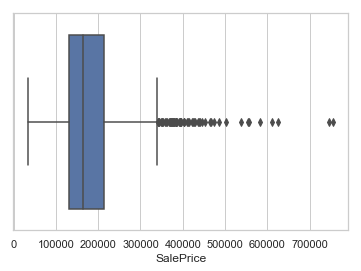

In [65]:
#Check target(sale price) stats
data.SalePrice = data.SalePrice.astype(int)
sns.boxplot(x=data.SalePrice)
print(data.SalePrice.describe())

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


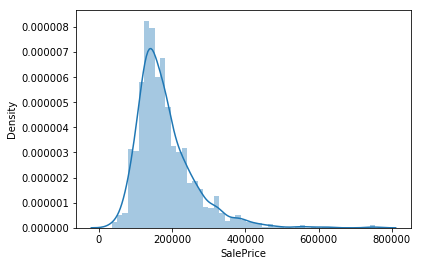

In [6]:
#Plot sale price distributions
sns.distplot(data.SalePrice)

In [7]:
#Check for incomplete row
incomplete_row = data[data.isnull().any(axis=1)]
print('Total number of rows: {}'.format(len(data)))
print('Number of rows with missing data: {}'.format(len(incomplete_row)))

Total number of rows: 1460
Number of rows with missing data: 1460


Every row has at least a column with missing data.

In [8]:
#Find a set of columns with 0 missing values.
no_nulls = set(data.columns[data.isnull().mean()==0])
print(no_nulls)

{'MSSubClass', 'Utilities', 'OverallQual', 'YearBuilt', 'HeatingQC', 'LandSlope', 'MoSold', 'Street', 'LotArea', 'WoodDeckSF', 'PavedDrive', 'LandContour', 'Fireplaces', 'KitchenAbvGr', 'BsmtUnfSF', 'HalfBath', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'SaleType', 'Id', 'Heating', 'GrLivArea', 'HouseStyle', 'OverallCond', 'Exterior2nd', 'Neighborhood', 'BedroomAbvGr', 'SalePrice', 'BsmtFullBath', 'YrSold', 'ExterCond', '2ndFlrSF', 'EnclosedPorch', 'LotShape', 'Foundation', 'CentralAir', 'Exterior1st', 'Functional', 'YearRemodAdd', 'ScreenPorch', 'Condition2', 'GarageArea', 'BldgType', 'RoofMatl', 'RoofStyle', 'LotConfig', 'MSZoning', '3SsnPorch', '1stFlrSF', 'KitchenQual', 'MiscVal', 'OpenPorchSF', 'BsmtFinSF1', 'PoolArea', 'LowQualFinSF', 'BsmtFinSF2', 'Condition1', 'BsmtHalfBath', 'ExterQual', 'GarageCars', 'SaleCondition'}


In [9]:
#Find a set of columns with missing values.
with_nulls = set(data.columns[data.isnull().mean()!=0])
print(with_nulls)

{'GarageType', 'GarageCond', 'BsmtExposure', 'MasVnrArea', 'BsmtFinType2', 'GarageYrBlt', 'GarageQual', 'Fence', 'BsmtQual', 'PoolQC', 'Alley', 'LotFrontage', 'MiscFeature', 'BsmtFinType1', 'MasVnrType', 'GarageFinish', 'FireplaceQu', 'Electrical', 'BsmtCond'}


In [10]:
#Find number of missing values in columns
data[with_nulls].isnull().sum()

GarageType        81
GarageCond        81
BsmtExposure      38
MasVnrArea         8
BsmtFinType2      38
GarageYrBlt       81
GarageQual        81
Fence           1179
BsmtQual          37
PoolQC          1453
Alley           1369
LotFrontage      259
MiscFeature     1406
BsmtFinType1      37
MasVnrType         8
GarageFinish      81
FireplaceQu      690
Electrical         1
BsmtCond          37
dtype: int64

Dealing with missing values:
1. Drop columns with more than 75% missing values.
2. Impute value for numerical columns with missing values.
3. Drop rows with missing values.

In [11]:
#Find a set of columns with more than 75% of the values missing
most_missing_cols = set(data.columns[data.isnull().mean() > 0.75])
print(most_missing_cols)

{'MiscFeature', 'PoolQC', 'Fence', 'Alley'}


In [12]:
#Check data types of columns with missing values
data[with_nulls].dtypes

GarageType       object
GarageCond       object
BsmtExposure     object
MasVnrArea      float64
BsmtFinType2     object
GarageYrBlt     float64
GarageQual       object
Fence            object
BsmtQual         object
PoolQC           object
Alley            object
LotFrontage     float64
MiscFeature      object
BsmtFinType1     object
MasVnrType       object
GarageFinish     object
FireplaceQu      object
Electrical       object
BsmtCond         object
dtype: object

In [13]:
#Find numberical columns with missing data
mask = data[with_nulls].dtypes != np.object
mask = mask[mask.values==True].index
data_missing = data[mask]
data_missing.head()

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


,MasVnrArea,GarageYrBlt,LotFrontage
0,196.0,2003.0,65.0
1,0.0,1976.0,80.0
2,162.0,2001.0,68.0
3,0.0,1998.0,60.0
4,350.0,2000.0,84.0


In [14]:
#Check number of missing value in each numerical columns
data_missing.isnull().sum()

MasVnrArea       8
GarageYrBlt     81
LotFrontage    259
dtype: int64

In [15]:
#Check value distribution in each numberical column with missing values
for col in data_missing.columns:
    print('Column {}:'.format(col))
    print(data_missing[col].describe())
    print('\n')

Column MasVnrArea:
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


Column GarageYrBlt:
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


Column LotFrontage:
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64




Impute method:
1. Columns with low std: Replace missing values with mean for columns GarageYrBlt and LotFrontage.
2. Columns with high std: Replace missing values with median for column MasVnrArea.

In [16]:
fill_mean = lambda col: col.fillna(col.mean())
fill_median = lambda col: col.fillna(col.median())
data_missing[['GarageYrBlt', 'LotFrontage']] = data_missing[['GarageYrBlt', 'LotFrontage']].apply(fill_mean, axis=0)
data_missing[['MasVnrArea']] = data_missing[['MasVnrArea']].apply(fill_median, axis=0)

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [72]:
#Generate new data
#Drop columns with more than 75% of the values missing and impute values columns
df = data.drop(columns = most_missing_cols.union(data_missing.columns))
#Concate columns with impute values
df = pd.concat([df,data_missing],axis=1)
#Drop rows with missing values
df = df.dropna(axis=1)
print('Data shape: {}'.format(df.shape))
df.head()

Data shape: (1460, 65)


,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MasVnrArea,GarageYrBlt,LotFrontage
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,2,2008,WD,Normal,208500,196.0,2003.0,65.0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,5,2007,WD,Normal,181500,0.0,1976.0,80.0
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,9,2008,WD,Normal,223500,162.0,2001.0,68.0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,2,2006,WD,Abnorml,140000,0.0,1998.0,60.0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,12,2008,WD,Normal,250000,350.0,2000.0,84.0


In [18]:
#Confirm no rows with null value
df[df.isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,MasVnrArea,GarageYrBlt,LotFrontage


C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt you

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

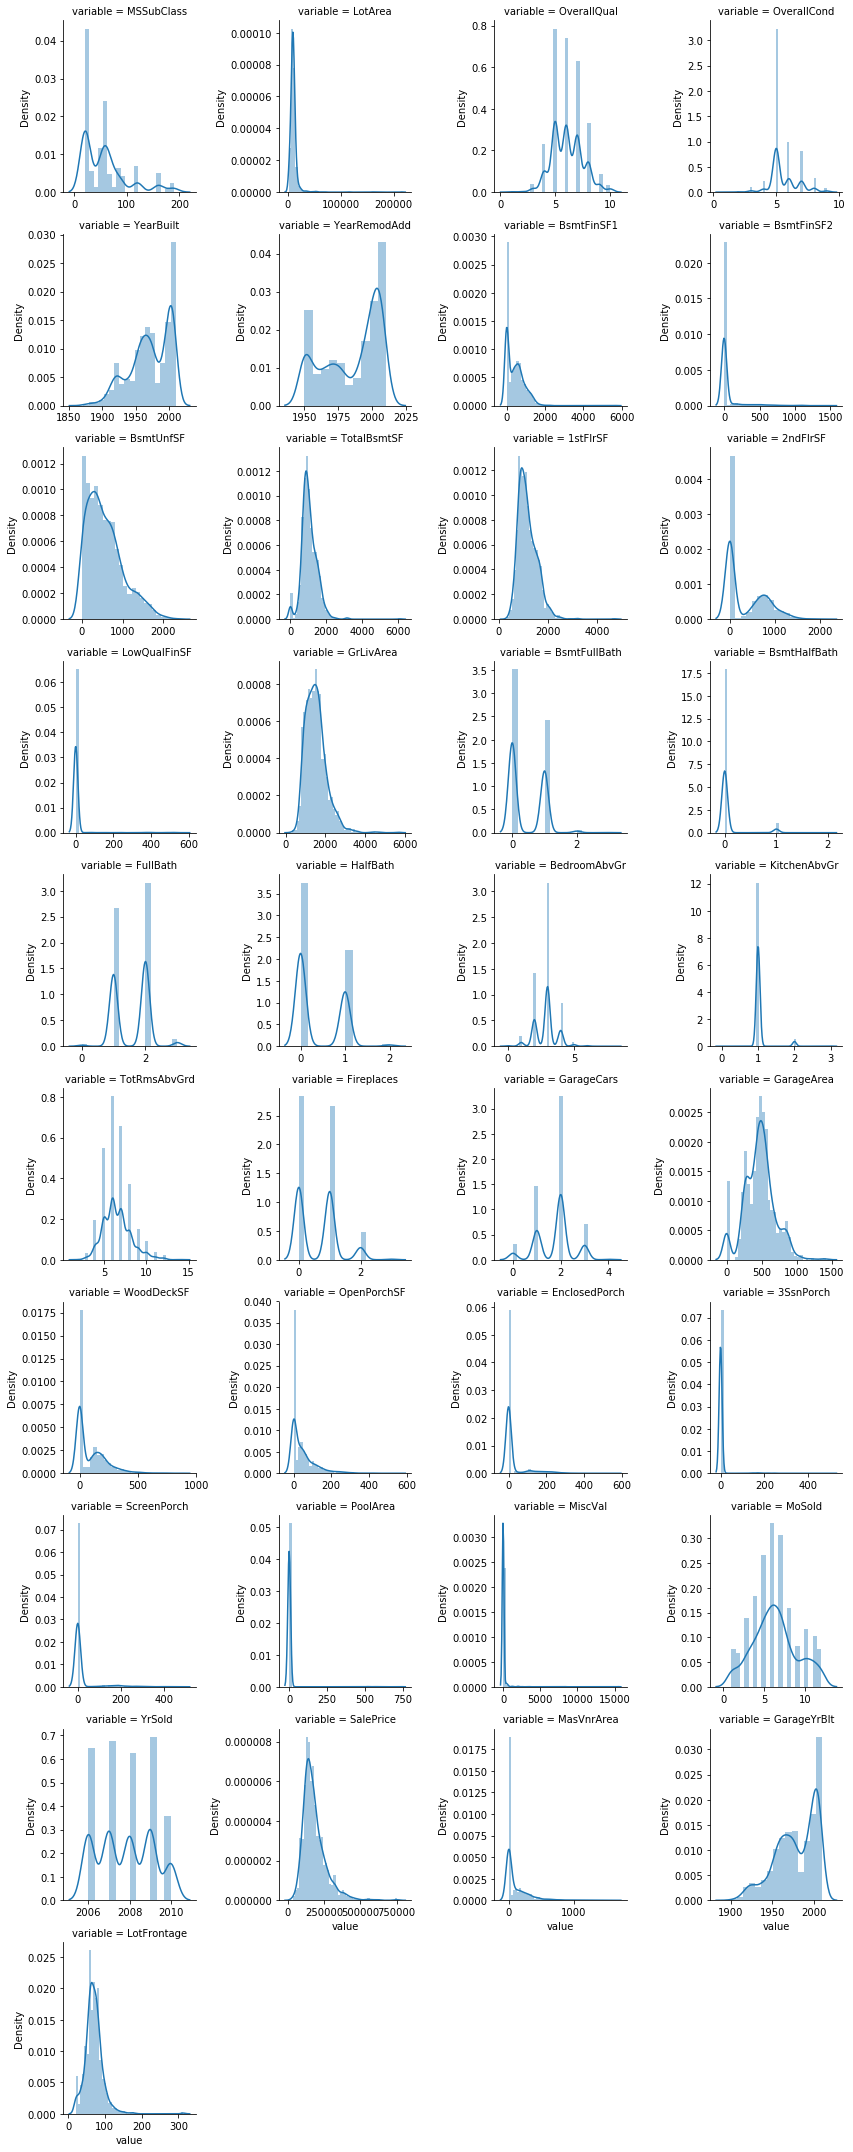

In [19]:
#create numeric plots
mask = df.dtypes != np.object
numeric_cols = df.columns[mask]
numeric_cols = numeric_cols.drop('Id')
plot_data = pd.melt(data[numeric_cols], value_vars = numeric_cols)
plot = sns.FacetGrid(plot_data, col='variable', col_wrap=4, sharex=False, sharey = False)
plot = plot.map(sns.distplot, 'value')
plot
#Distribution of Numberic Features are skewed. Need to apply log transformation.

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


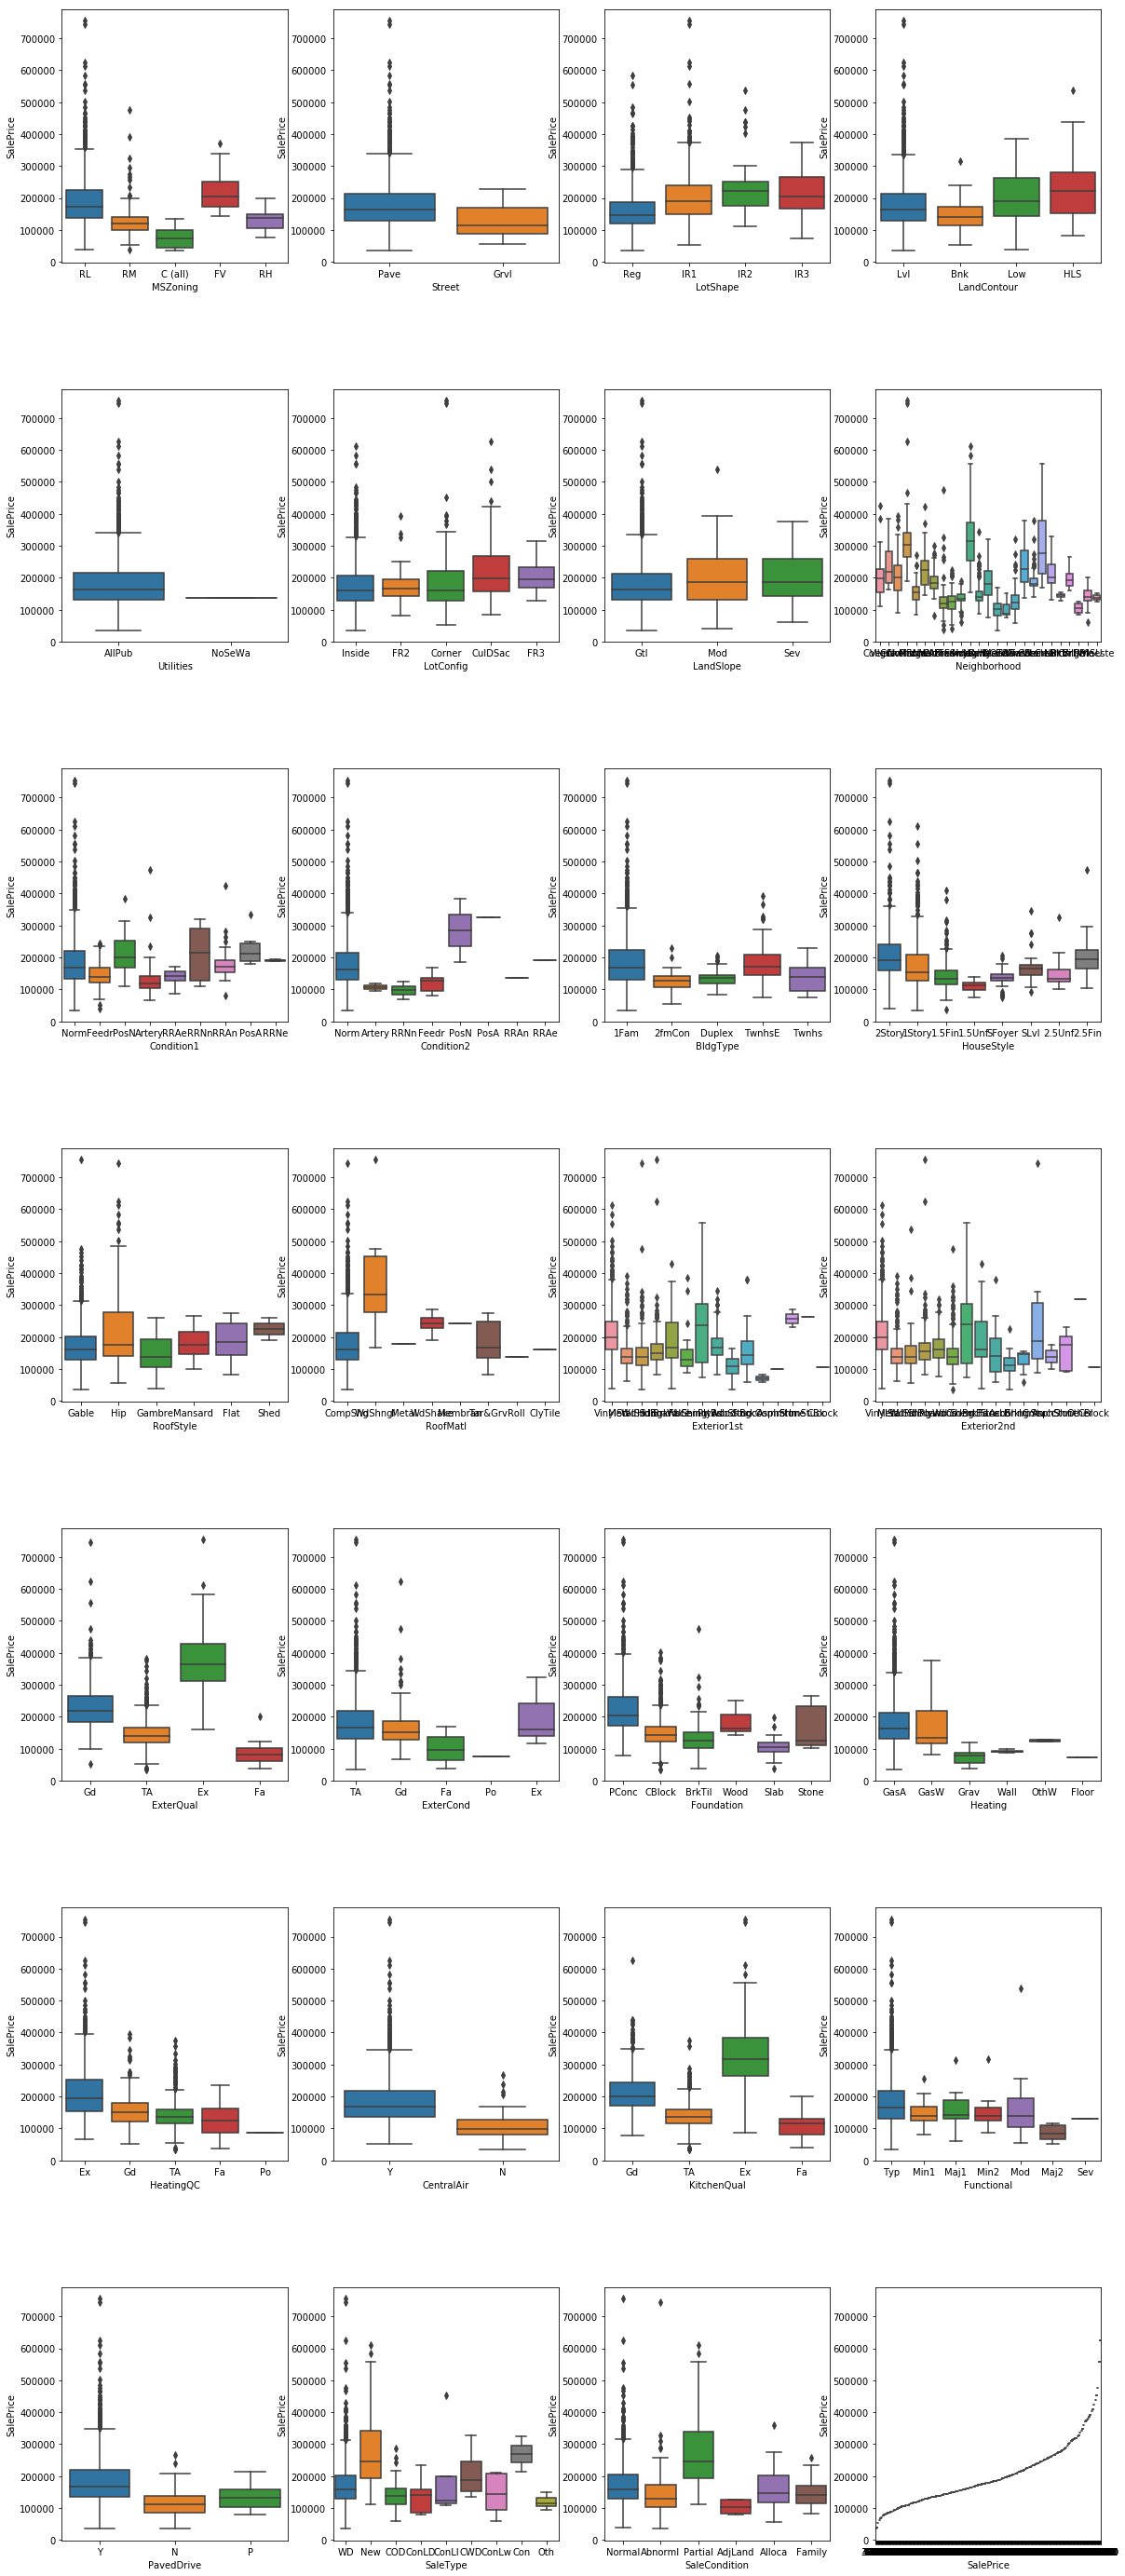

In [20]:
#create categorical plots
mask = df.dtypes == np.object
categorical_cols = df.columns[mask].to_list()
plot_col = categorical_cols
plot_col.append('SalePrice')
p_df = df[plot_col]

fig, axes = plt.subplots(7, 4, figsize=(20,50))
fig.subplots_adjust(hspace=0.5)

for ax, feature in zip(axes.flatten(), plot_col):
    sns.boxplot(x=p_df[feature], y=p_df['SalePrice'],  orient='v', ax=ax)

Check correlation of numerical features with target:
* Extract dataframe numerical columns and target column
* Perform correlation
* Plot barplot with respective feature correlation values

In [21]:
df_num = df[numeric_cols]
df_corr = pd.concat([df_num], axis=1)
corr = df_corr.corr()
corr_SalePrice = corr.SalePrice
corr_SalePrice = corr_SalePrice.abs()
corr_SalePrice = corr_SalePrice.drop(index='SalePrice')
corr_SalePrice = corr_SalePrice.reset_index()
corr_SalePrice.rename(columns={'index':'features','SalePrice':'correlation'},inplace=True)
corr_SalePrice.sort_values(by='correlation', ascending=False, inplace=True)

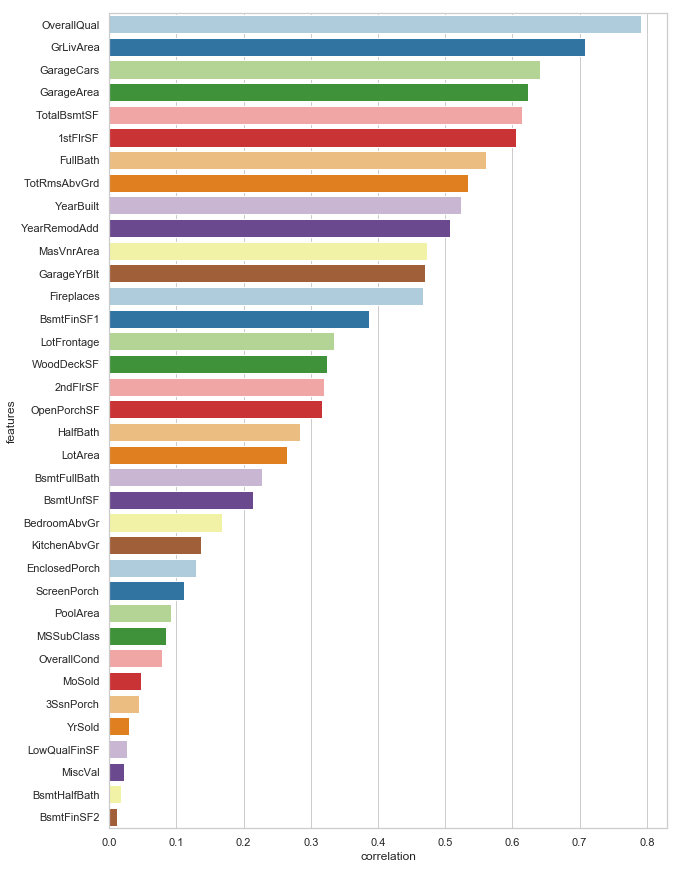

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 15))
sns.barplot(y=corr_SalePrice['features'], x=corr_SalePrice['correlation'], palette="Paired", orient='h')

##### Perform analysis on the data with categorical features:
* Plot count plots of categorical data.
* Check correlation of categorical features with target.

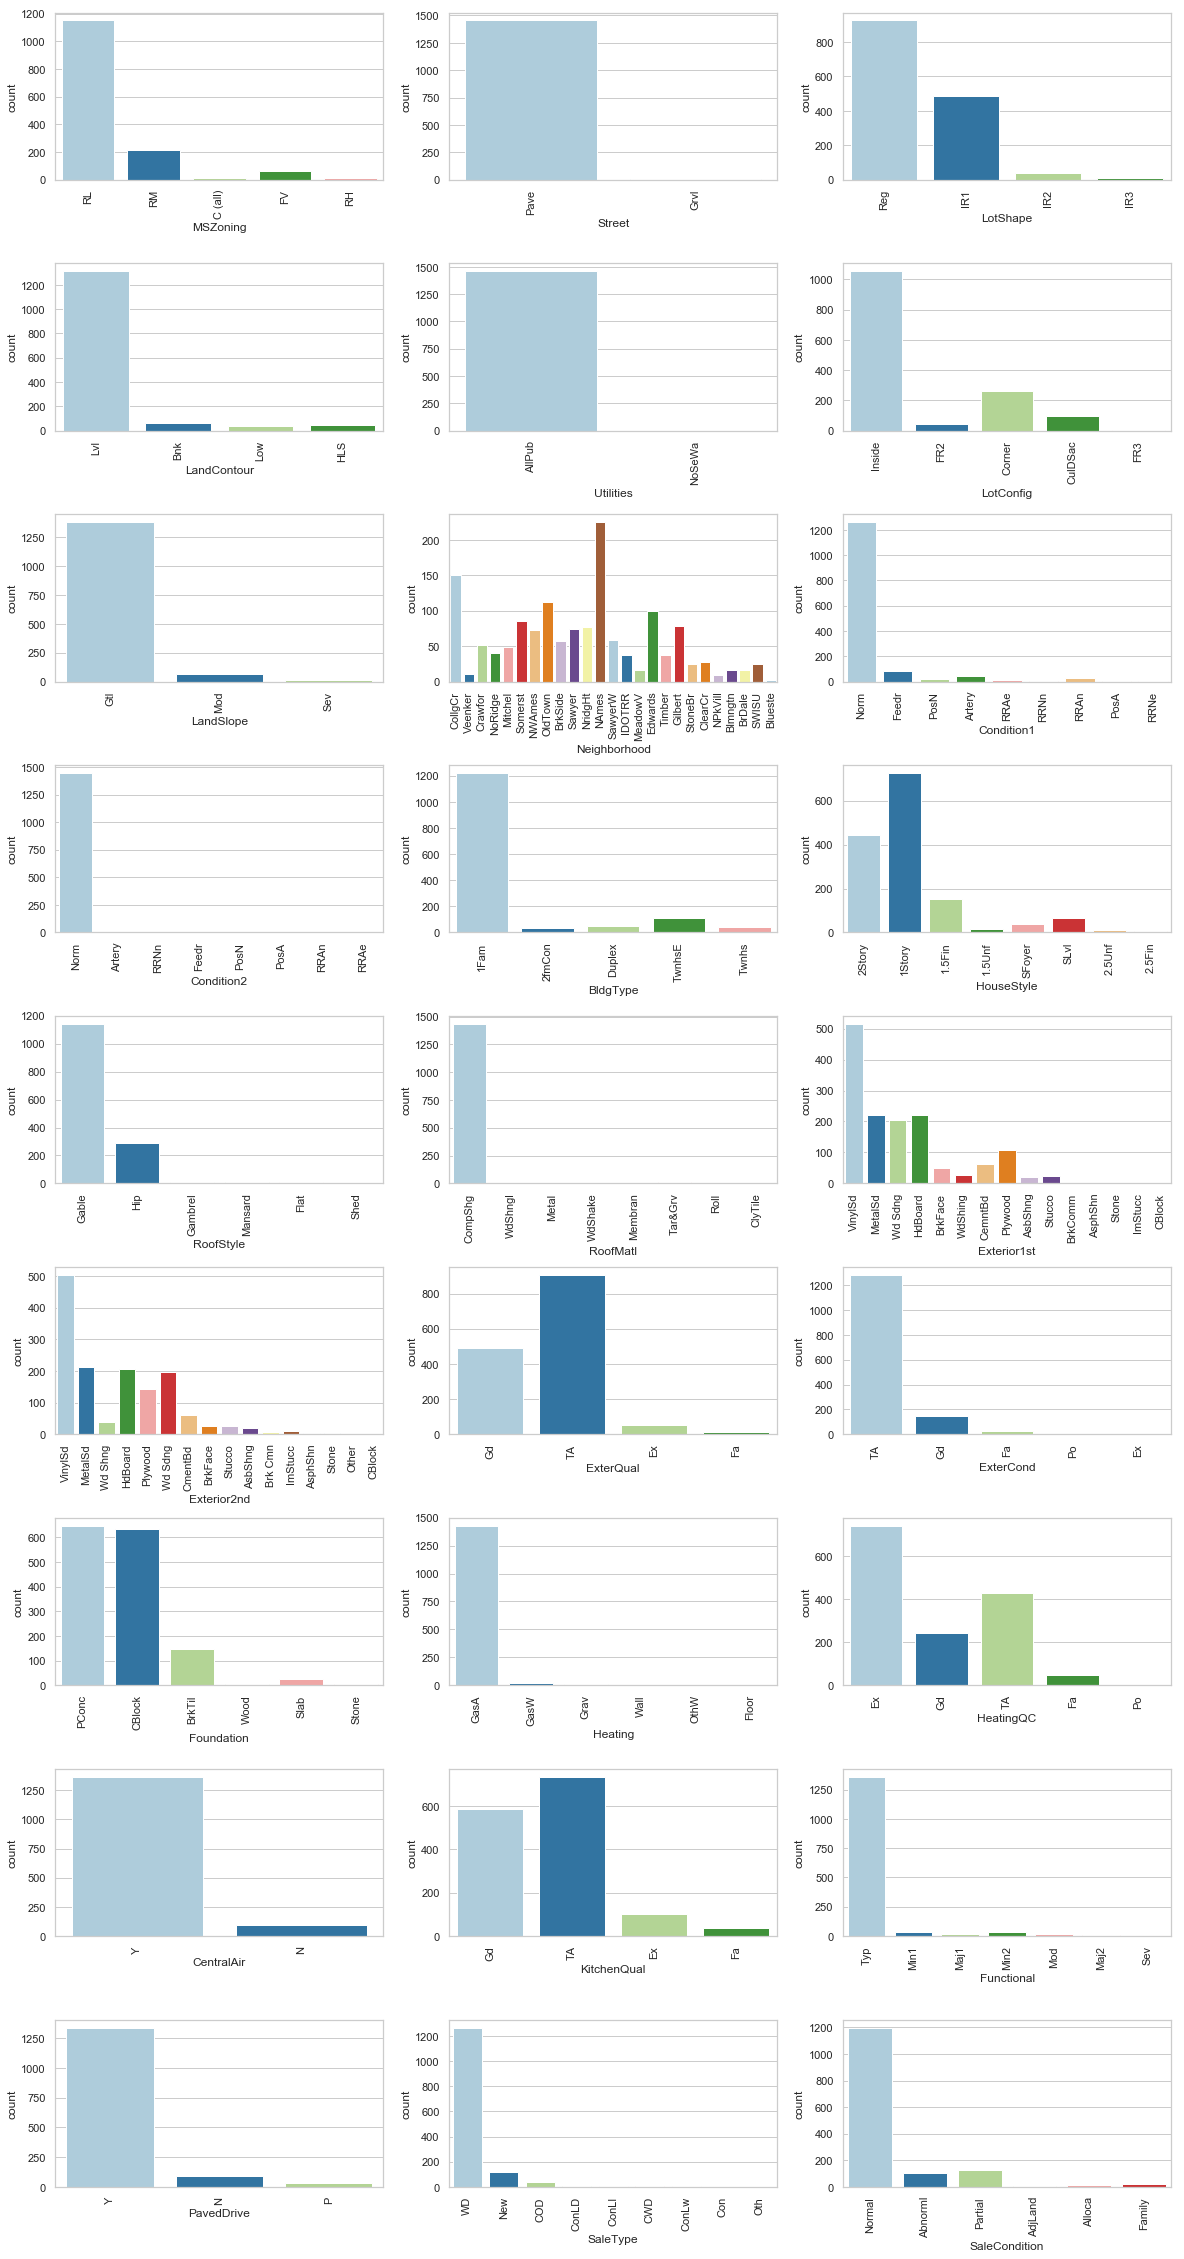

In [23]:
df_cat = df[categorical_cols]
fig, axes = plt.subplots(9, 3, figsize=(20,40))
fig.subplots_adjust(hspace=0.5)
rotation = 90
for i, ax in enumerate(fig.axes):
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)
for ax, feature in zip(axes.flatten(), categorical_cols):
    sns.countplot(x=df[feature], ax=ax, palette="Paired")

Check correlation of categorical features with target:
* Create a function to generate individual categorical feature with one hot encoded columns and target column
* Perform correlation for each feature
* Plot barplot with respective feature correlation values

In [24]:
def genCorr(feature):
    data_cat = df[feature]
    df_cat = pd.get_dummies(data_cat)
    data_pred = pd.concat([df_cat, df.SalePrice], axis=1)
    #data_pred.target.replace({' <=50K':0, ' >50K':1},inplace=True) 
    corr = data_pred.corr()
    corr_target = corr.SalePrice
    corr_target = corr_target.abs()
    corr_target.sort_values(ascending=False,inplace=True)  
    corr_target = corr_target.drop(index='SalePrice')
    corr_target.sort_index(inplace=True)
    corr_target = corr_target.reset_index()
    corr_target.rename(columns={'index':feature,'SalePrice':'correlation'},inplace=True)
    return corr_target

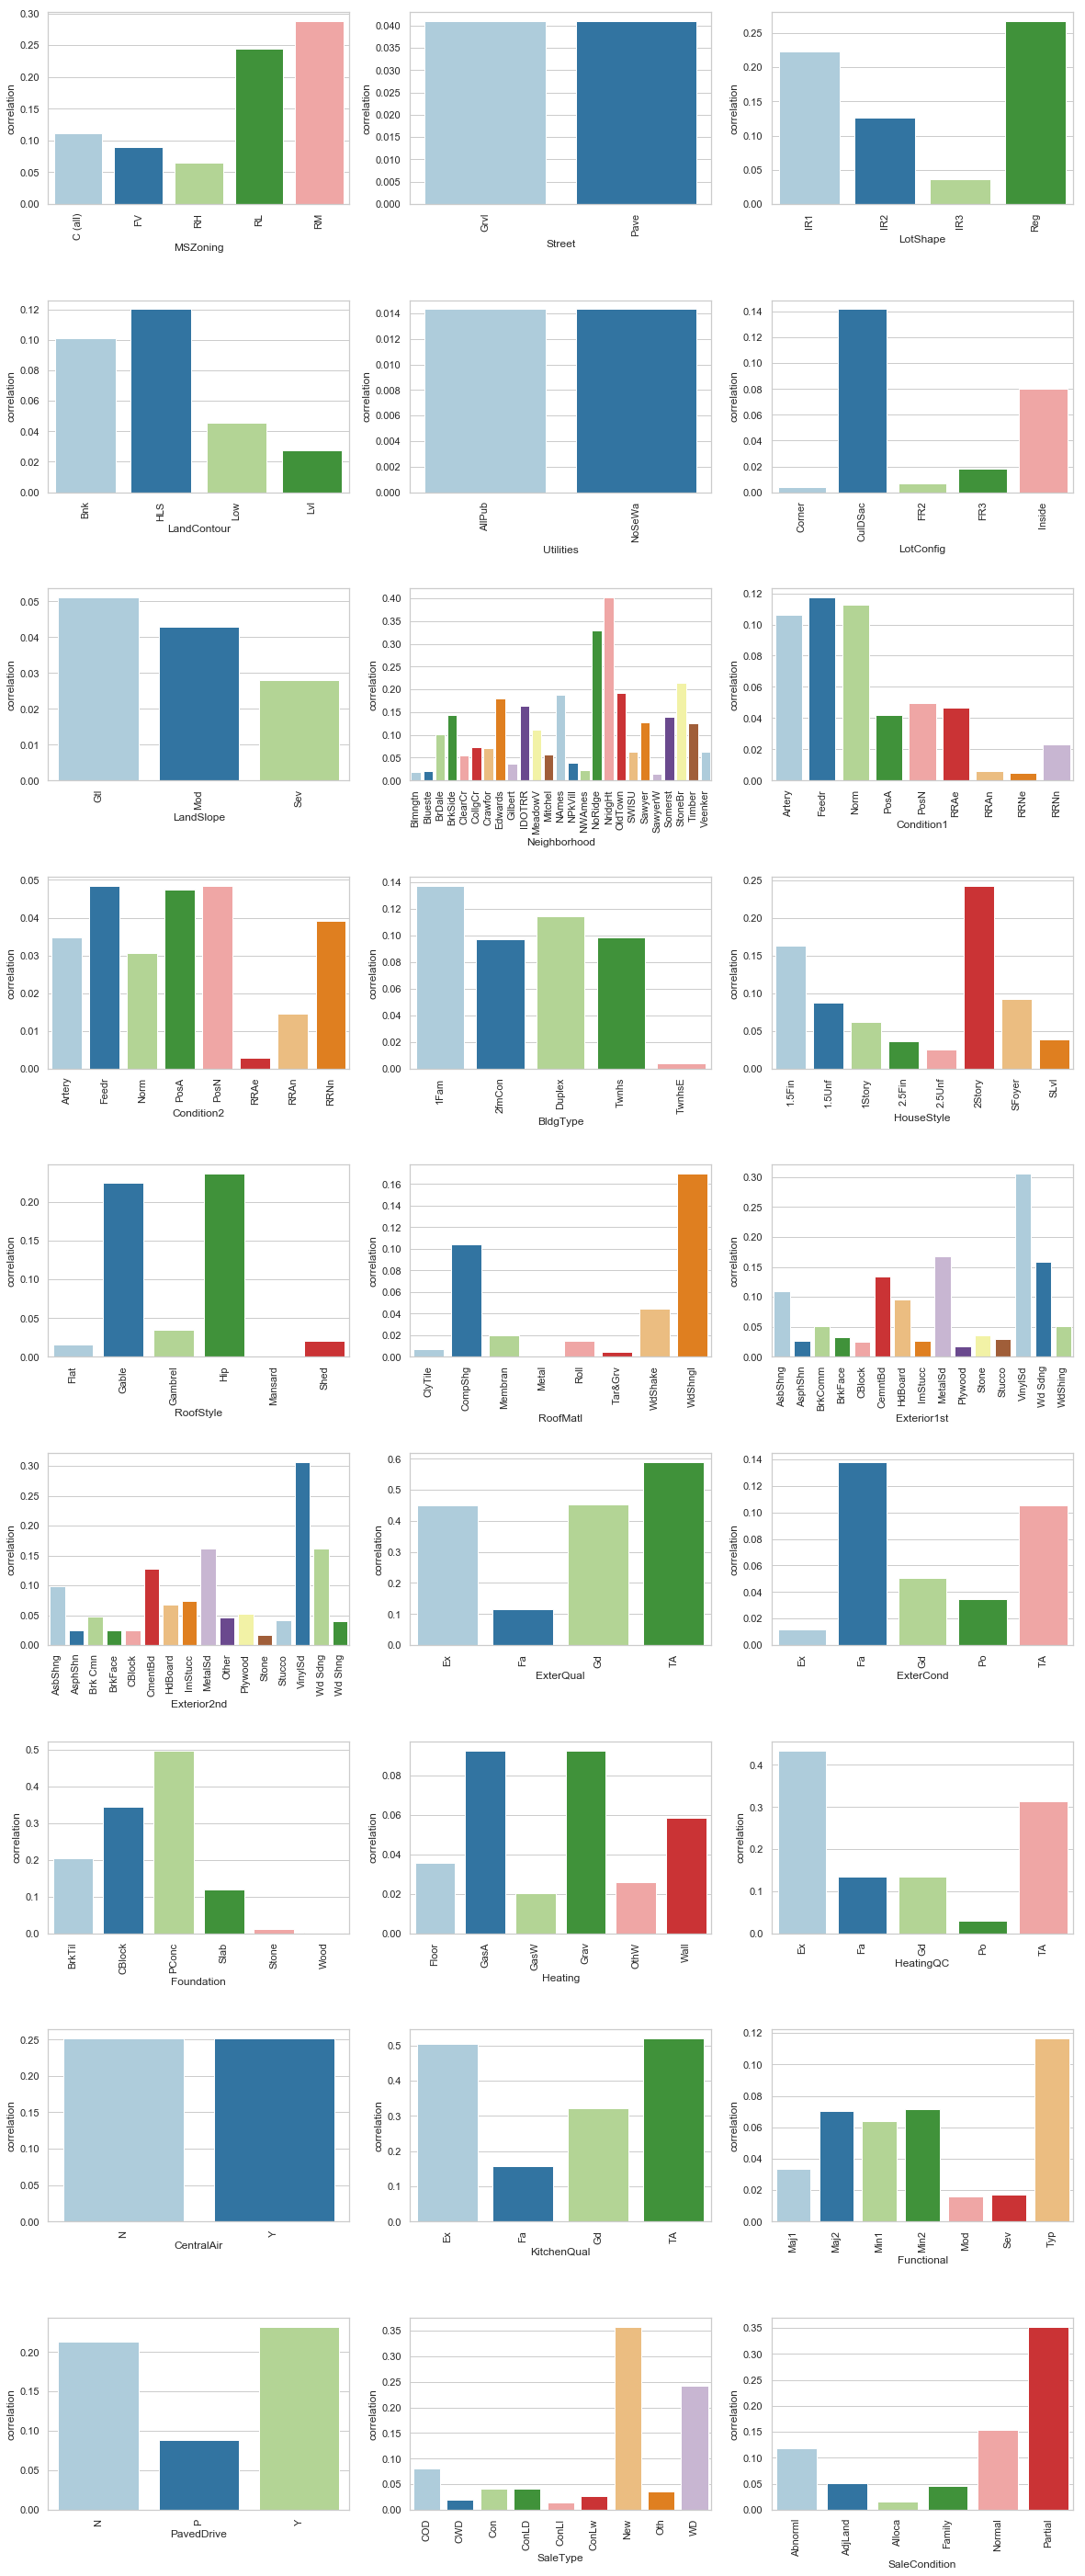

In [25]:
fig, axes = plt.subplots(9, 3, figsize=(20,50))
fig.subplots_adjust(hspace=0.5)
rotation = 90
for i, ax in enumerate(fig.axes):   
     ax.set_xticklabels(ax.get_xticklabels(), rotation = rotation)
for ax, feature in zip(axes.flatten(), categorical_cols[:-1]):
    sns.barplot(x=genCorr(feature)[feature], y=genCorr(feature)['correlation'], ax=ax, palette="Paired")

Filter top categorical and numerical features with at least 0.3 correlation with sale price.

In [26]:
#Extract top associated numerical features with correlation to sale price. 
top_features = corr_SalePrice[corr_SalePrice.correlation>0.3].features.to_list()

In [27]:
#Extract top categorica features with correlation to sale price. 
for feature in categorical_cols[:-1]:
    corr = genCorr(feature)
    corr_max = corr.correlation.max()
    if corr_max>=0.3:
        top_features.append(feature)
    else:
        pass
        

In [28]:
print('Features with more than 0.3 correlation with sale price are: {}'.format(top_features))

Features with more than 0.3 correlation with sale price are: ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'Neighborhood', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'HeatingQC', 'KitchenQual', 'SaleType', 'SaleCondition']


In [29]:
#Extract non-associated categorical features with correlation to sale price. 
bottom_features = corr_SalePrice.sort_values(by='correlation',ascending=True)[corr_SalePrice.correlation<0.3].features.to_list()
#Extract top non associated numerical features with correlation to sale price. 
for feature in categorical_cols[:-1]:
    corr = genCorr(feature)
    corr_max = corr.correlation.max()
    if corr_max<0.3:
        bottom_features.append(feature)
    else:
        pass

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [30]:
print('Features with less than 0.3 correlation with sale price are: {}'.format(bottom_features))

Features with less than 0.3 correlation with sale price are: ['BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'LowQualFinSF', 'YrSold', '3SsnPorch', 'MoSold', 'OverallCond', 'MSSubClass', 'PoolArea', 'ScreenPorch', 'EnclosedPorch', 'KitchenAbvGr', 'BedroomAbvGr', 'BsmtUnfSF', 'BsmtFullBath', 'LotArea', 'HalfBath', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'ExterCond', 'Heating', 'CentralAir', 'Functional', 'PavedDrive']


## Q1: What are the top associated and non-associated features of housing attributes with the pricing of Boston houses? 

Top associated attributes with housing pricing are: 
- OverallQual: Rates the overall material and finish of the house.
- GrLivArea: Above grade (ground) living area square feet.
- GarageCars: Size of garage in car capacity.
- GarageArea: Size of garage in square feet.
- TotalBsmtSF: Total square feet of basement area.

Top non-associated attributes with housing pricing are: 
- BsmtFinSF2: Type 2 finished square feet.
- BsmtHalfBath: Basement half bathrooms.
- MiscVal: Value of miscellaneous feature.
- LowQualFinSF: Low quality finished square feet (all floors).
- YrSold: Year Sold (YYYY).

In [31]:
#Generate function to bin housing attributes for plots
def fillbin(value,bins):
    for bin in bins:
        if value in bin:
            label_bin = bin
        else:
            pass
    return label_bin

#Generate function to explore housing attribute in boxplot and barplot
def genPlot(df,feature,label_rotation,label_size,height,quantile):
    feature_unique = len(df[feature].unique())
    #Generate dataframe break to bins if attribute is numerical and have more than 20 unique values
    if (df[feature].dtypes != np.object) and (feature_unique >= 20):
        df_bar = df.groupby(pd.cut(df[feature], 20)).SalePrice.median()
        bins = df_bar.index.to_list()
        
        df_box = df[[feature,'SalePrice']]
        df_box[feature] = df_box[feature].apply(fillbin, bins=bins)
        df_box.sort_values(feature,inplace=True)        
    
    #Generate dataframe for categorical attributes
    else:
        df_bar = df.groupby(feature).SalePrice.median()
        df_box = df[[feature,'SalePrice']]
    
    #Plot box and bar plot
    sns.set(style="whitegrid")
    #plt.figure(figsize=(10, 5))
    fig, axes = plt.subplots(2, 1, figsize=(25,height))
    fig.subplots_adjust(hspace=0.2)
    sns.boxplot(ax=axes[0], x=df_box[feature], y=df_box["SalePrice"], palette="Paired")
    sns.barplot(ax=axes[1],  x=df_bar.index, y=df_bar.values, palette="Paired")
    #axes[1].set_ylabel('SalePrice')
    axes[0].set_title('SalePrice Vs '+ feature + ' ('+quantile+')', size = 24)
    for i, ax in enumerate(fig.axes):  
        ax.set_ylabel('SalePrice', size=label_size)
        ax.set_xlabel(feature, size=label_size)
        ax.set_yticklabels(ax.get_yticks(), size = label_size)
        ax.set_xticklabels(ax.get_xticklabels(), rotation = label_rotation, size = label_size)

## Q2. Explore the top associated and non-associated features of housing attributes with the pricing of Boston houses.

Explore the top associated features of housing attributes with the pricing of Boston houses.

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


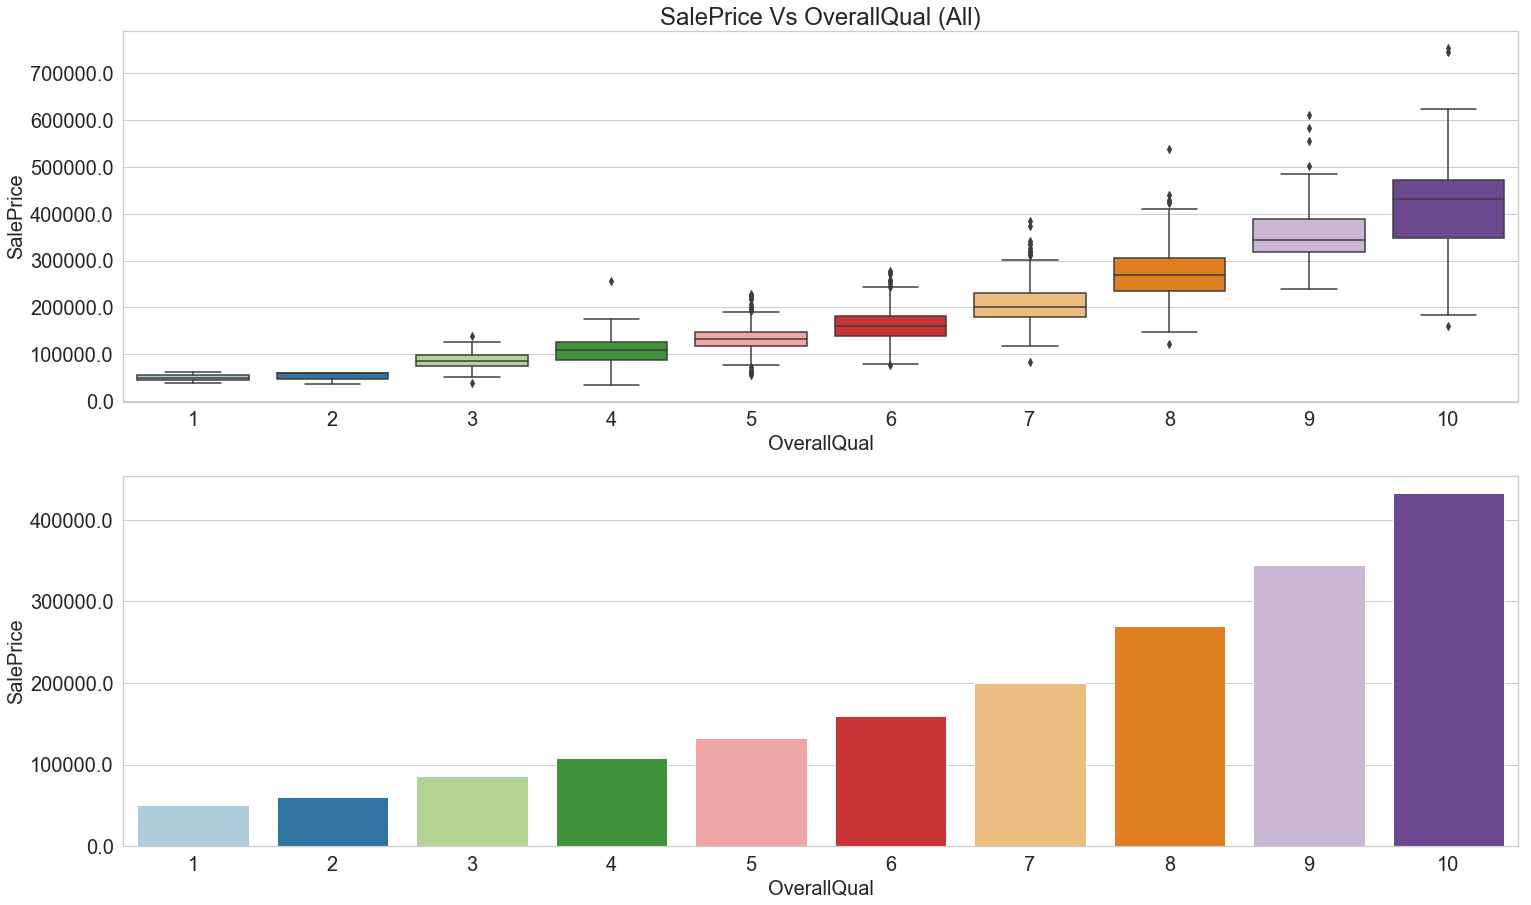

In [32]:
#Generate plots for Overall Quality attribute of housings
genPlot(df,'OverallQual',0,20,15,'All')

The plots show significant increasing trend in median housing pricing with increase in quality of housing.

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

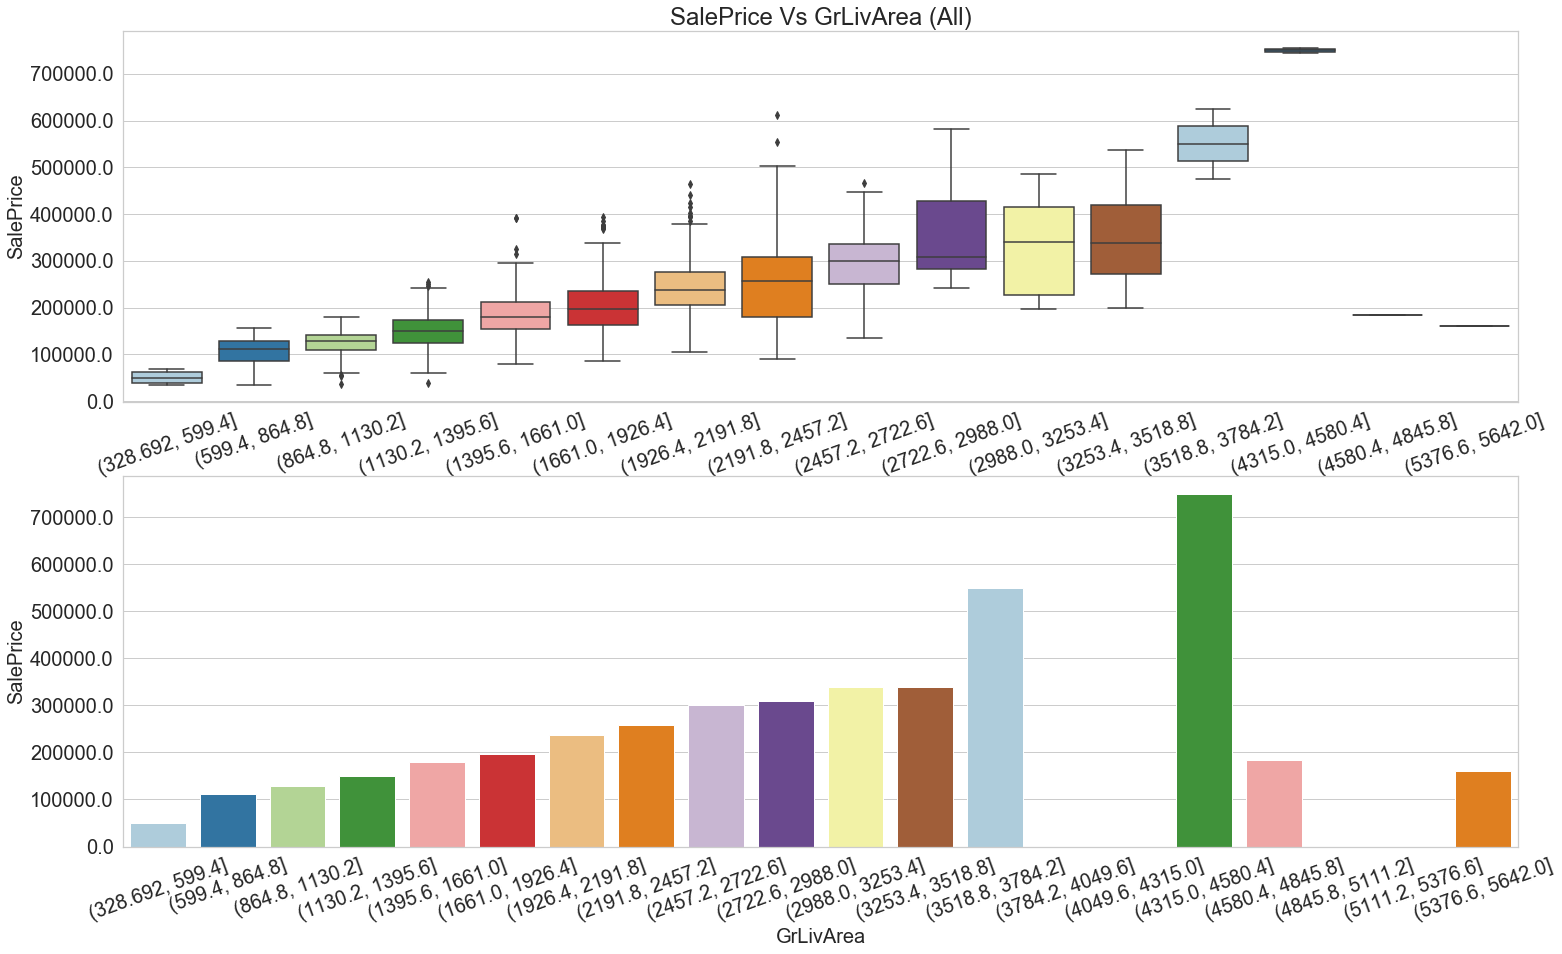

In [33]:
#Generate plots for Ground Living Area of housing attribute
genPlot(df,'GrLivArea',20,20,15,'All')

The plots show significant increasing trend in median housing pricing with higher ground living areas in the housings.

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


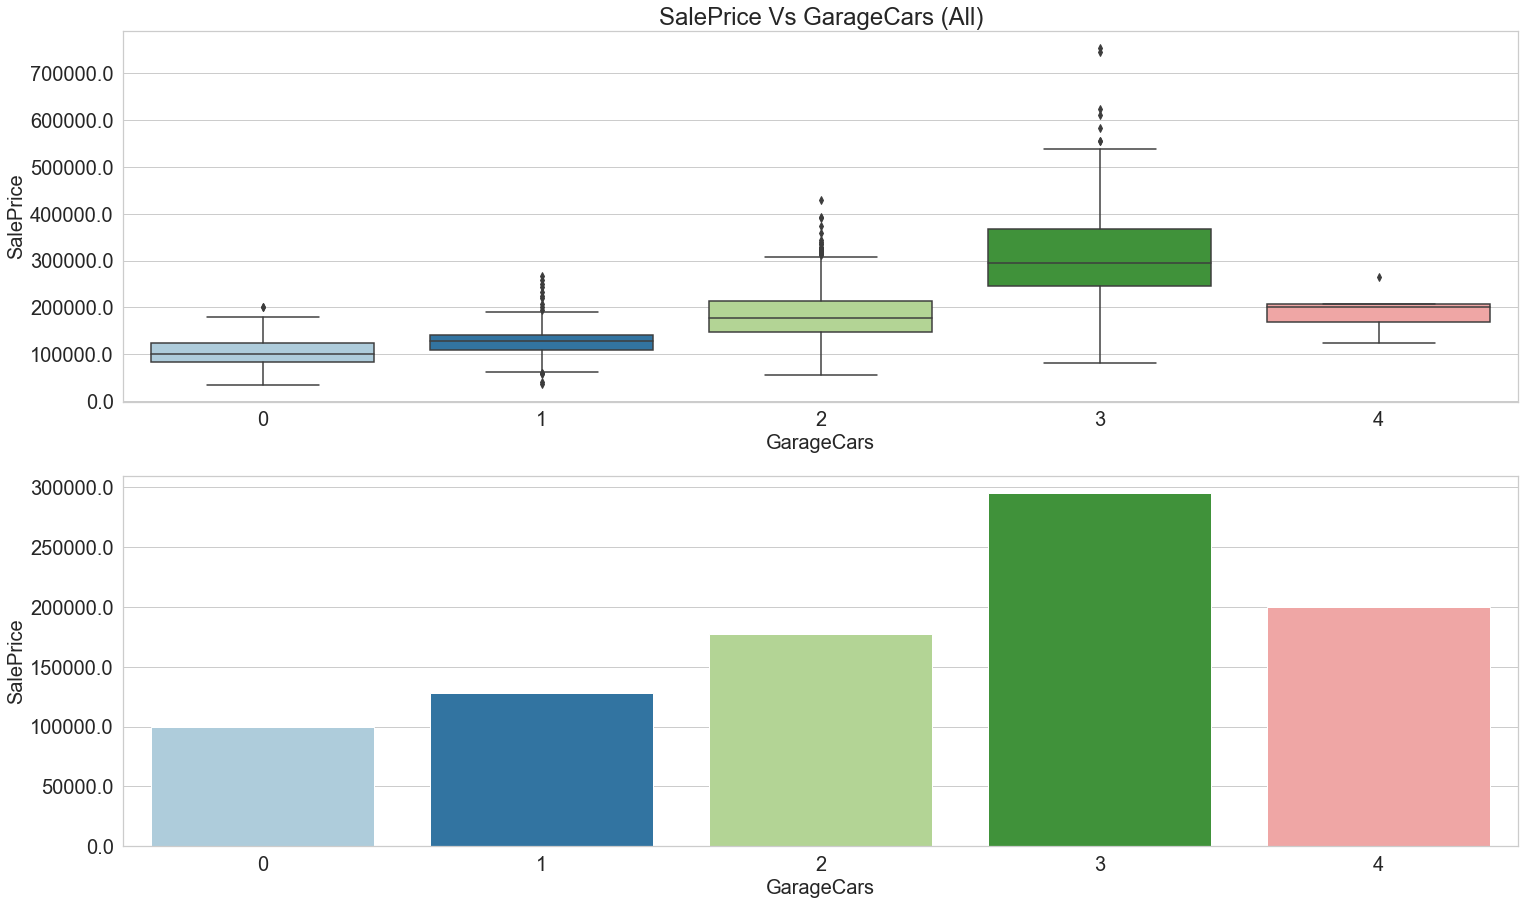

In [34]:
#Generate plots for Garage Cars Capacity of housing attribute
genPlot(df,'GarageCars',0,20,15,'All')

The plots show significant increasing trend in median housing pricing with higher availability of garage car capacity in the housings.

Explore the top non-associated features of housing attributes with the pricing of Boston houses.

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

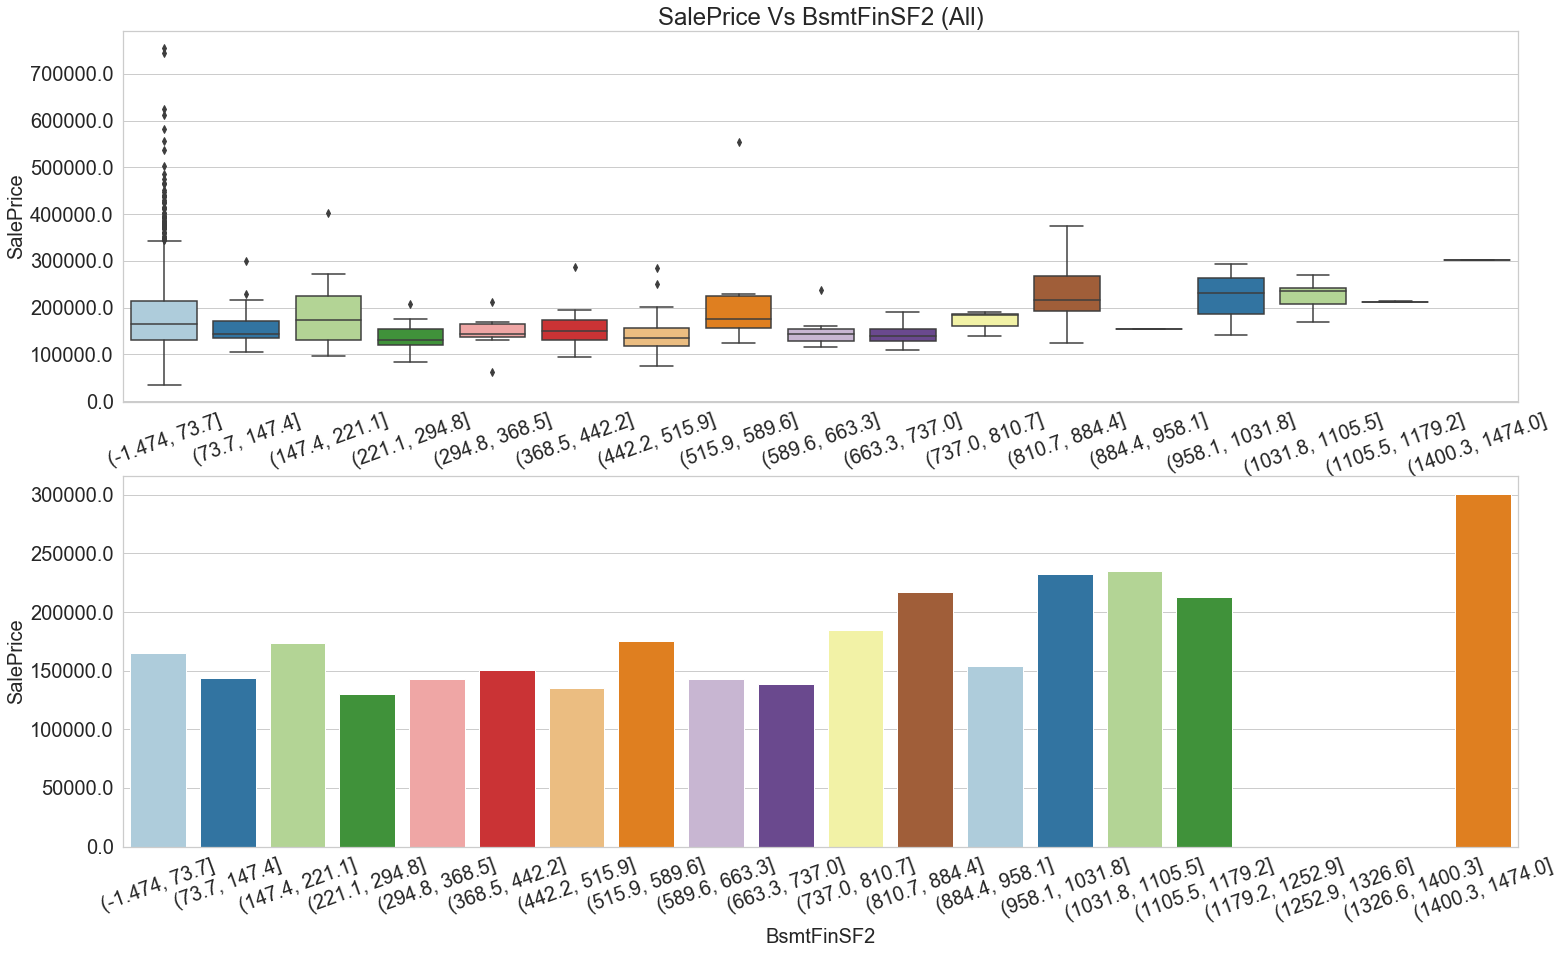

In [35]:
#Generate plots for BsmtFinSF2 housing attribute
genPlot(df,'BsmtFinSF2',20,20,15,'All')

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


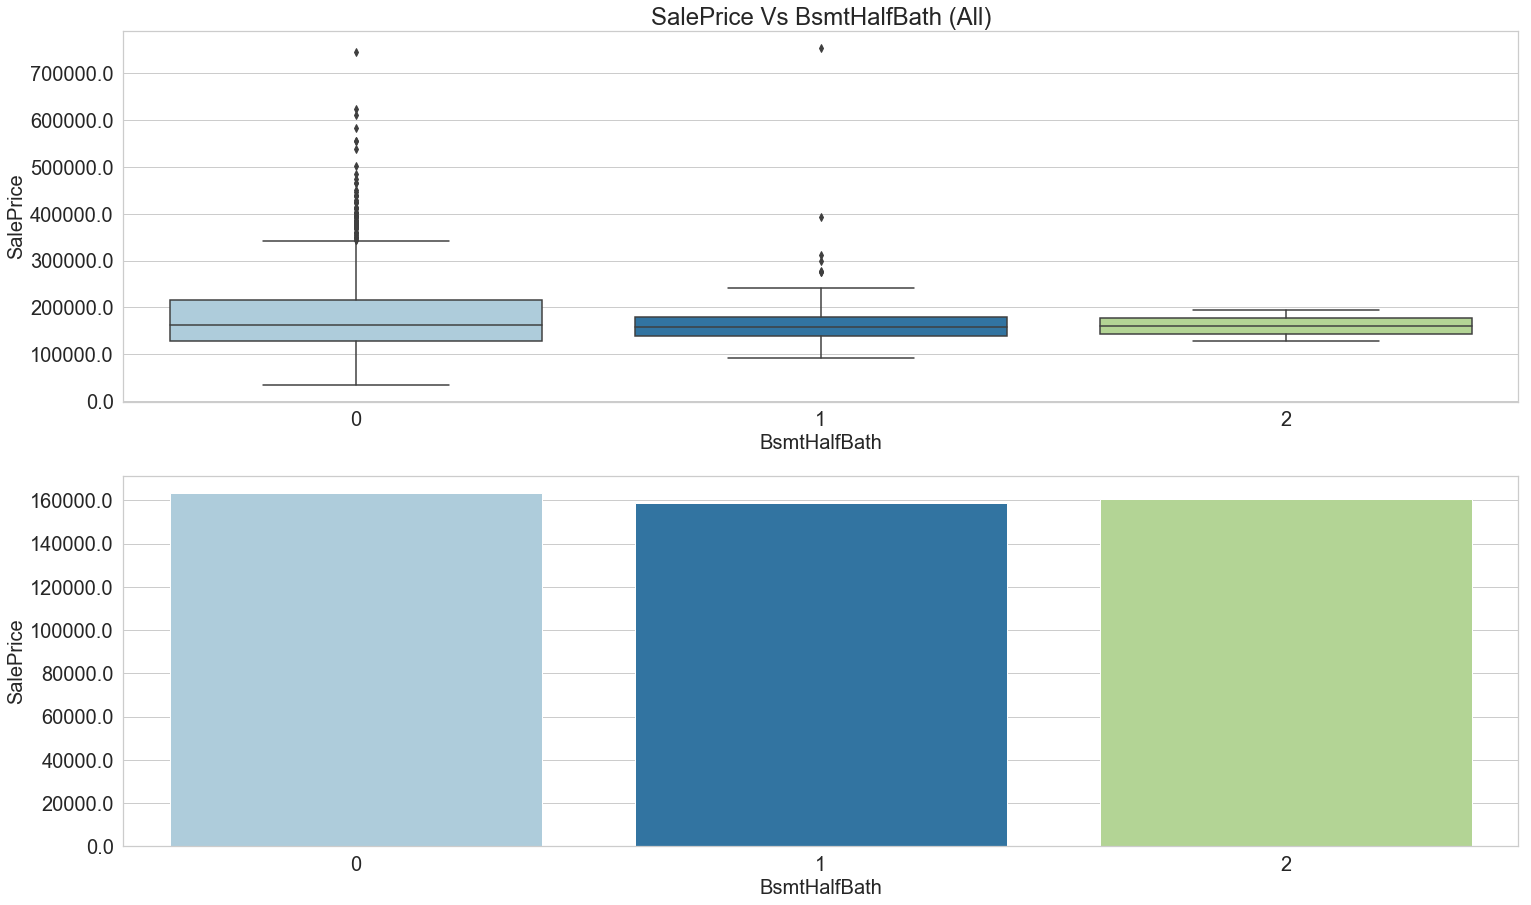

In [36]:
#Generate plots for BsmtHalfBath housing attribute
genPlot(df,'BsmtHalfBath',0,20,15,'All')

C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\yeohanboon\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentatio

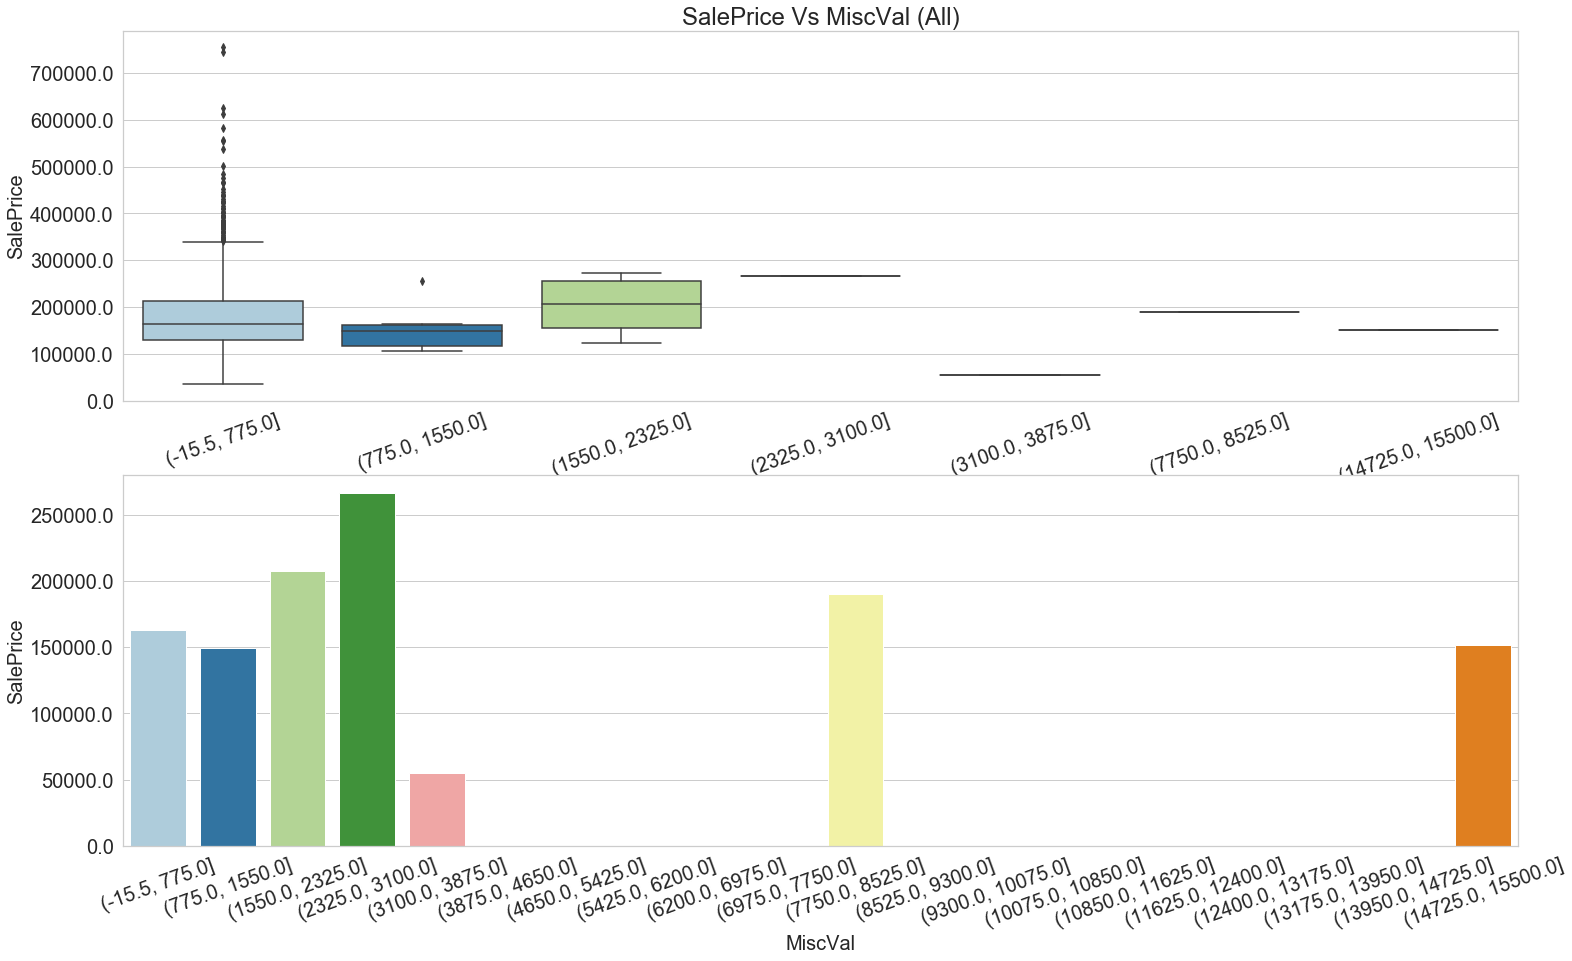

In [37]:
#Generate plots for MiscVal housing attribute
genPlot(df,'MiscVal',20,20,15,'All')

The plots clearly show no clear trend in housing pricing with the top non-associated features of housing attributes.

## Q3. Fit a linear regression model to the training data of selected features and calculate the MSE of the model. 

In [38]:
#Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [39]:
#Extract top numerical features with correlation to sale price. 
numerical_features = corr_SalePrice[corr_SalePrice.correlation>0.3].features.to_list()
print(numerical_features)

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF']


In [40]:
#Extract top categorical features with correlation to sale price. 
categorical_features = []
for feature in categorical_cols[:-1]:
    corr = genCorr(feature)
    corr_max = corr.correlation.max()
    if corr_max>=0.3:
        categorical_features.append(feature)
    else:
        pass
print(categorical_features)       

['Neighborhood', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'HeatingQC', 'KitchenQual', 'SaleType', 'SaleCondition']


In [41]:
df_numeric = df[numerical_features]
df_numeric.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF
0,7,1710,2,548,856,856,2,8,2003,2003,196.0,2003.0,0,706,65.0,0,854,61
1,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1976.0,1,978,80.0,298,0,0
2,7,1786,2,608,920,920,2,6,2001,2002,162.0,2001.0,1,486,68.0,0,866,42
3,7,1717,3,642,756,961,1,7,1915,1970,0.0,1998.0,1,216,60.0,0,756,35
4,8,2198,3,836,1145,1145,2,9,2000,2000,350.0,2000.0,1,655,84.0,192,1053,84


In [42]:
df_categorical = pd.DataFrame()
for feature in categorical_features:
    df_col = df[feature]
    df_onehot = pd.get_dummies(df_col)
    df_onehot.rename(columns=lambda x: feature+'_'+x, inplace=True)
    df_categorical = pd.concat([df_categorical,df_onehot], axis=1)
df_categorical.head()

,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [43]:
print('Total number of categorical columns: {}'.format(len(df_categorical.columns)))

Total number of categorical columns: 90


In [44]:
#Prepare training data
df_X = pd.concat([df_numeric,df_categorical], axis=1)
df_y = df.SalePrice
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.4, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((876, 108), (584, 108), (876,), (584,))

In [45]:
#Fit Linear Regression model
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions_train = lm.predict(X_train)
predictions_test = lm.predict(X_test)

print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions_train)))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_test)))

Train RMSE: 30364.391411702625
Test RMSE: 34692.98293729342


In [46]:
#Fit Linear Regression model
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions_train = lm.predict(X_train)
predictions_test = lm.predict(X_test)

print('Train MAE:', metrics.mean_absolute_error(y_train, predictions_train))
print('Test MAE:', metrics.mean_absolute_error(y_test, predictions_test))
print('Train MSE:', metrics.mean_squared_error(y_train, predictions_train))
print('Test MSE:', metrics.mean_squared_error(y_test, predictions_test))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions_train)))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_test)))


Train MAE: 19156.89293529511
Test MAE: 21640.431570269076
Train MSE: 921996265.8030802
Test MSE: 1203603065.087332
Train RMSE: 30364.391411702625
Test RMSE: 34692.98293729342


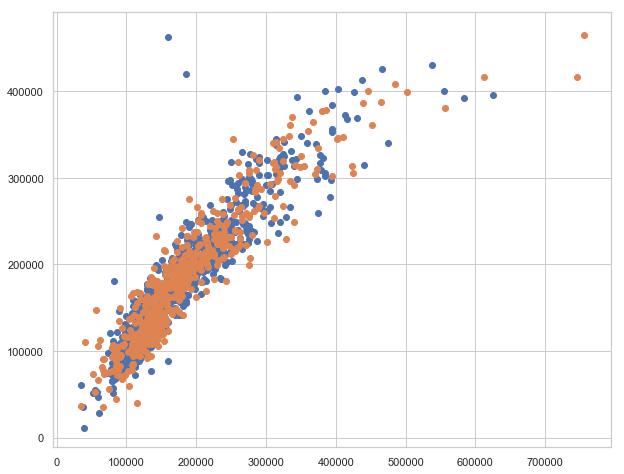

In [47]:
#Plot predictions vs actual the models.
plt.figure(figsize=(10, 8))
plt.scatter(y_train,predictions_train)
plt.scatter(y_test,predictions_test)

In [48]:
#Define learning curve plot
def plot_learning_curves(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    lm = LinearRegression()
    
    train_errors, val_errors = [], []
    plt.figure(figsize=(10, 8))
    plt.ylim([0, 150000])
    for m in range(1, len(X_train),5):
        lm.fit(X_train[:m],y_train[:m])
        y_train_predict = lm.predict(X_train[:m])
        y_test_predict = lm.predict(X_test)
        train_errors.append(metrics.mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(metrics.mean_squared_error(y_test_predict, y_test))
        plt.plot(np.sqrt(train_errors), "r", linewidth=0.1, label="train")
        plt.plot(np.sqrt(val_errors), "b", linewidth=0.1, label="val")

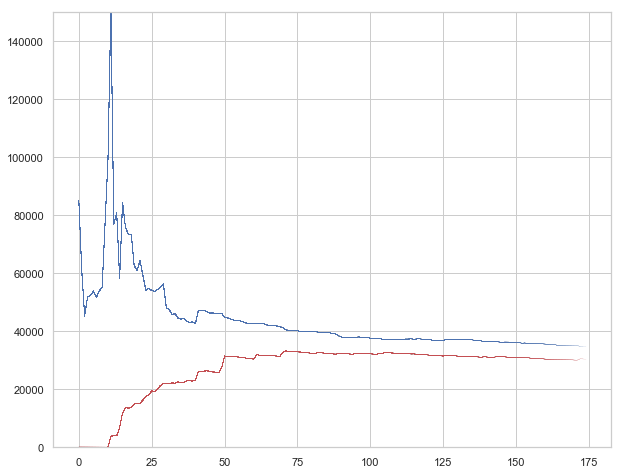

In [49]:
plot_learning_curves(df_X,df_y)

- The trained and test model has a RMSE of 30364 and 34692. 
- From the prediction vs actual plot, the predictions are quite accurate for samples with sale price below 300000 and the acurracy of the model decreases with sale price. This could be due to insufficent training samples for housing with high sale prices. Addition of more data samples with sale price above 300000 will likely improve the model.
- From the learning curve, the model is not over fitting and after 75 steps the error of both plot goes to near equilibrium meaning additional of current similar dataset will not improve the model.


## Q4. How does the model metrics differ using all categorical features or chi square method?

Use all categorical by applying dummies and accepting all features for training.

In [50]:
#Extract top numerical features with correlation to sale price. 
numerical_features = corr_SalePrice[corr_SalePrice.correlation>0.3].features.to_list()
print(numerical_features)

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF']


In [51]:
df_categorical_all = pd.DataFrame()
for feature in categorical_cols[0:-1]:
    df_col = df[feature]
    df_onehot = pd.get_dummies(df_col)
    df_onehot.rename(columns=lambda x: str(feature)+'_'+x, inplace=True)
    df_categorical_all = pd.concat([df_categorical_all,df_onehot], axis=1)
df_categorical_all.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [52]:
print('Total number of categorical columns: {}'.format(len(df_categorical_all.columns)))

Total number of categorical columns: 182


In [53]:
#Prepare training data for all categorical columns
df_X_all = pd.concat([df_numeric,df_categorical_all], axis=1)
df_y = df.SalePrice
X_train, X_test, y_train, y_test = train_test_split(df_X_all, df_y, test_size=0.4, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((876, 200), (584, 200), (876,), (584,))

In [54]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions_train = lm.predict(X_train)
predictions_test = lm.predict(X_test)
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions_train)))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_test)))

Train RMSE: 22068.088047286772
Test RMSE: 29188.35792241773


In [55]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions_train = lm.predict(X_train)
predictions_test = lm.predict(X_test)

print('Train MAE:', metrics.mean_absolute_error(y_train, predictions_train))
print('Test MAE:', metrics.mean_absolute_error(y_test, predictions_test))
print('Train MSE:', metrics.mean_squared_error(y_train, predictions_train))
print('Test MSE:', metrics.mean_squared_error(y_test, predictions_test))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions_train)))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_test)))

Train MAE: 14327.46571172791
Test MAE: 18598.919945689053
Train MSE: 487000510.0628013
Test MSE: 851960238.2071658
Train RMSE: 22068.088047286772
Test RMSE: 29188.35792241773


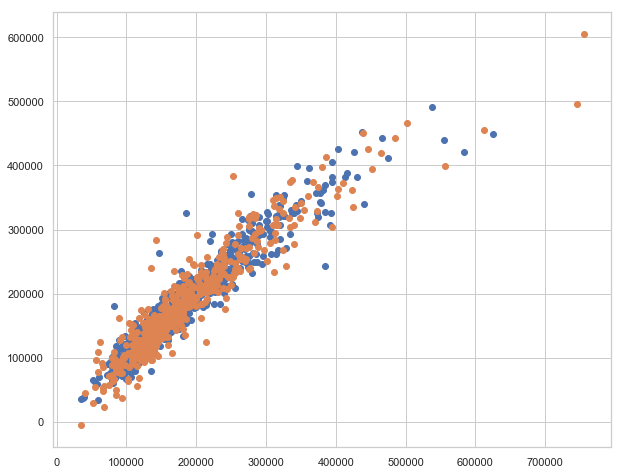

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10, 8))
plt.scatter(y_train,predictions_train)
plt.scatter(y_test,predictions_test)

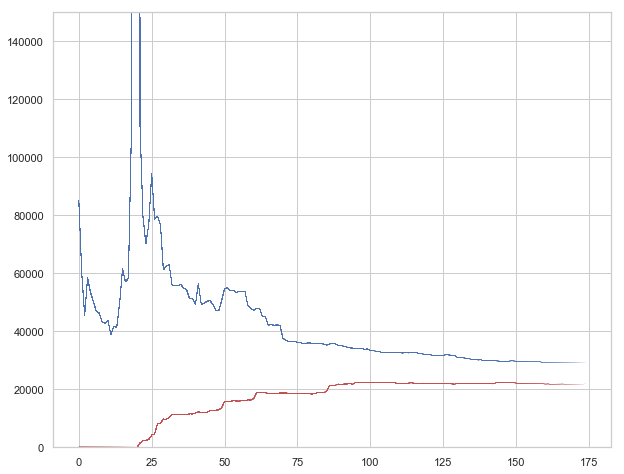

In [57]:
plot_learning_curves(df_X_all,df_y)

- The trained and test model has a RMSE of 22068 and 29188. 
- From the learning curve, model 2 is lower in bias and higher in variance than model 1. Meaning it is more over fitted.

Using Chi-Squared test to select K best features

In [58]:
from sklearn.feature_selection import SelectKBest, chi2
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k=108) #select same number of categorical features in model 1 for comparison.
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

In [59]:
#Prepare training data to include all catergorical columns.
df_X_all = pd.concat([df_numeric,df_categorical_all], axis=1)
df_y = df.SalePrice
X_train, X_test, y_train, y_test = train_test_split(df_X_all, df_y, test_size=0.4, random_state=42)
#Using SelectKBest to select important features.
X_train_fs, X_test_fs = select_features(X_train, y_train, X_test)
X_train_fs.shape, X_test_fs.shape, y_train.shape, y_test.shape

((876, 108), (584, 108), (876,), (584,))

In [60]:
lm = LinearRegression()
lm.fit(X_train_fs,y_train)
predictions_train = lm.predict(X_train_fs)
predictions_test = lm.predict(X_test_fs)
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions_train)))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_test)))

Train RMSE: 29237.507148014767
Test RMSE: 34175.64678144052


In [61]:
lm = LinearRegression()
lm.fit(X_train_fs,y_train)
predictions_train = lm.predict(X_train_fs)
predictions_test = lm.predict(X_test_fs)

print('Train MAE:', metrics.mean_absolute_error(y_train, predictions_train))
print('Test MAE:', metrics.mean_absolute_error(y_test, predictions_test))
print('Train MSE:', metrics.mean_squared_error(y_train, predictions_train))
print('Test MSE:', metrics.mean_squared_error(y_test, predictions_test))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, predictions_train)))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_test)))

Train MAE: 19277.864622252084
Test MAE: 22118.859590172753
Train MSE: 854831824.2302146
Test MSE: 1167974832.9297857
Train RMSE: 29237.507148014767
Test RMSE: 34175.64678144052


In [62]:
def plot_learning_curvesFS(X,y):
    X_train, X_test, y_train, y_test = train_test_split(df_X_all, df_y, test_size=0.4, random_state=42)
    X_train_fs, X_test_fs = select_features(X_train, y_train, X_test)
    lm = LinearRegression()
    train_errors, val_errors = [], []
    plt.figure(figsize=(10, 8))
    plt.ylim([0, 150000])
    for m in range(1, len(X_train_fs),5):
        lm.fit(X_train_fs[:m],y_train[:m])
        y_train_predict = lm.predict(X_train_fs[:m])
        y_test_predict = lm.predict(X_test_fs)
        train_errors.append(metrics.mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(metrics.mean_squared_error(y_test_predict, y_test))
        plt.plot(np.sqrt(train_errors), "r", linewidth=0.1, label="train")
        plt.plot(np.sqrt(val_errors), "b", linewidth=0.1, label="val")

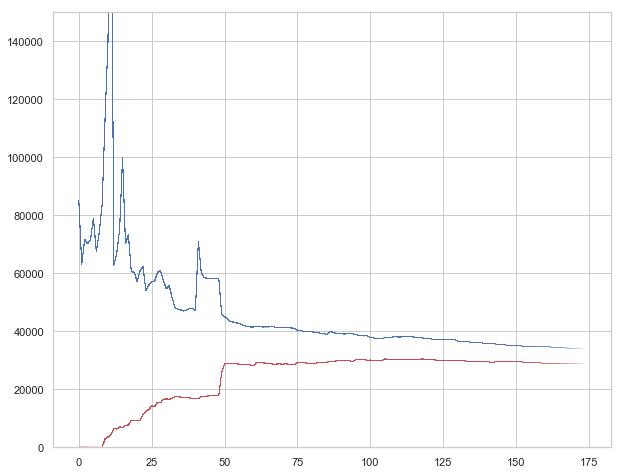

In [63]:
plot_learning_curvesFS(df_X_all,df_y)

- The trained and test model has a RMSE of 29237 and 34175. 
- Model 3 has close results to model 1 comparing RMSE of 34692.

## Conclusion

The Boston housing dataset contains housing prices with over 63 usable types of housing attributes. We wanted to explore the feasibility of using the attributes to predict pricing of houses using regression machine learning techniques. Before that, we require to identify the attributes with high association with housing prices. Out of the 63 attributes, 36 are numerical features and 29 are categorical features. 

By applying correlation method to housing prices, the relationship of each attribute to pricing were ranked. Then it was verified in plots of the top associated and non-associated attributes which clearly showed increasing trend with pricing for associated attribute only. 

Finally, a comparison of linear regression model metric was made on using all categorical features and using categorical feature selection by Chi Square. Indeed using all categorical features pull downs the performance of the model. The method of categorical feature selecton by correlation method is comparable to the Chi Square method. 